In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from Bio import SeqIO


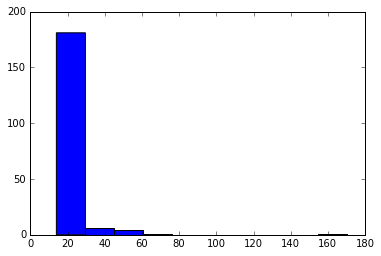

('before filter:', 193)
('after_filter:', 192)


In [2]:
####define input file
infile_name = "isiRNAs.fa"
####define length cutoff
cutoff_len = 100
##################################

##################################
####read
infile = SeqIO.parse(infile_name,"fasta")
####get lengths
lengths = []
for record in infile:
    temp_len = len(record.seq)
    lengths.append(temp_len)
####plot log lengths
plt.hist(lengths)
plt.show()
####
print("before filter:", len(lengths))
###################################
####implement length cutoff
####read
infile = SeqIO.parse(infile_name,"fasta")
####index
record_dict = SeqIO.index(infile_name,"fasta")
###cutoff
filtered = []
for record in infile:
    if len(record.seq) < cutoff_len:
        filtered.append(record)
####
print("after_filter:",len(filtered))

In [3]:
#######define negative control sequence file
negfile_name = "Negatives_shRNAscramble.txt"
##################################

##################################
####read and add to filtered
negfile = SeqIO.parse(negfile_name,"fasta")
for record in negfile:
    print(record)
    filtered.append(record)
####write out filtered to file
SeqIO.write(filtered, "filtered.fa", "fasta")

ID: SHC016
Name: SHC016
Description: SHC016
Number of features: 0
Seq('GCGCGATAGCGCTAATAATTT', SingleLetterAlphabet())
ID: SHC002
Name: SHC002
Description: SHC002
Number of features: 0
Seq('CAACAAGATGAAGAGCACCAA', SingleLetterAlphabet())


194

In [4]:
######define parameters for library construction
###
adapterF = "CTGTGTAATCTCCGACACccac"
adapterR = "gctgGCCTTTGCATGTTGTGGA"
adaptor_setID = "4"
###
digestLeft = "tcccaGAGACG"
digestRight = "CGTCTCaccga"
###
TuD_hairpin = "CAAGTATTCTGGTCACAGAATACAAC"
##################################

##################################
#######construct library
finalfile = SeqIO.parse("filtered.fa","fasta")
###
libfile = []
for record in finalfile:
    record.seq = adapterF + digestLeft + record.seq.reverse_complement() + TuD_hairpin + record.seq.reverse_complement() + digestRight + adapterR
    libfile.append(record)
#######write out library to file
libfile_name = "libfile_adaptorset_"+adaptor_setID+".fa"
SeqIO.write(libfile, libfile_name, "fasta")

194

In [5]:
####################check work
#############define index to examine
i = 0
##################################

##################################
print(libfile[i].seq)

print(filtered[i].seq)

CTGTGTAATCTCCGACACccactcccaGAGACGTGATATCATCAGTTCACAAGTATTCTGGTCACAGAATACAACTGATATCATCAGTTCACGTCTCaccgagctgGCCTTTGCATGTTGTGGA
TGAACTGATGATATCA
